In [27]:
import pandas as pd
import glob
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv(r"C:\Users\kesav\Guvi\guvi main\c5\data\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

In [3]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [7]:
df_s=df.copy()

In [8]:
flat_type = {
    '1 ROOM': '1',
    '2 ROOM': '2',
    '3 ROOM': '3',
    '4 ROOM': '4',
    '5 ROOM': '5',
    'EXECUTIVE': '3',
    'MULTI GENERATION': 'MULTI-GENERATION',
    'MULTI-GENERATION': 'MULTI-GENERATION'
}

In [9]:
df_s['flat_type'] = df_s['flat_type'].map(flat_type)

In [10]:
flat_model = {
    'IMPROVED': 'Normal',
    'NEW GENERATION': '3GEN',
    'MODEL A': 'MODEL A',
    'STANDARD': 'Normal',
    'SIMPLIFIED': 'Normal',
    'MODEL A-MAISONETTE': 'Duplexes',
    'APARTMENT': 'APARTMENT',
    'MAISONETTE': 'Duplexes',
    'TERRACE': 'TERRACE',
    '2-ROOM': '2-ROOM',
    'IMPROVED-MAISONETTE': 'Duplexes',
    'MULTI GENERATION': '3GEN',
    'PREMIUM APARTMENT': 'APARTMENT',
    'Improved': 'Normal',
    'New Generation': '3GEN',
    'Model A': 'MODEL A',
    'Standard': 'Normal',
    'Apartment': 'APARTMENT',
    'Simplified': 'Normal',
    'Model A-Maisonette': 'Duplexes',
    'Maisonette': 'Duplexes',
    'Multi Generation': '3GEN',
    'Adjoined flat': 'APARTMENT',
    'Premium Apartment': 'APARTMENT',
    'Terrace': 'TERRACE',
    'Improved-Maisonette': 'Duplexes',
    'Premium Maisonette': 'Duplexes',
    '2-room': '2-ROOM',
    'Model A2': 'MODEL A2',
    'Type S1': 'TYPE S1',
    'Type S2': 'TYPE S2',
    'DBSS': 'Normal',
    'Premium Apartment Loft': 'APARTMENT',
    '3Gen': '3GEN'
}
df_s['flat_model'] = df_s['flat_model'].map(flat_model)

In [11]:
df_s['storey_range']=df_s['storey_range'].str[-2:]
df_s['storey_range']=df_s['storey_range'].astype(int)

In [16]:
df_s.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [17]:
# Regular expression to capture year and month
regex = r'(\d{4})-(\d{2})'

# Extract year and month into separate columns
df_s[['A_year', 'A_month']] = df_s['month'].str.extract(regex)

In [18]:
# Reindex columns
df_s=df_s[['A_year','A_month','month','town','flat_type','block','street_name',
         'storey_range','floor_area_sqm','flat_model',
         'lease_commence_date','remaining_lease','resale_price']]

In [23]:
df_s = df_s.drop(columns=['month'])

In [24]:
from sklearn.preprocessing import OrdinalEncoder
df_s['town'] = OrdinalEncoder().fit_transform(df_s[['town']])
df_s['street_name'] = OrdinalEncoder().fit_transform(df_s[['street_name']])
df_s['flat_model'] = OrdinalEncoder().fit_transform(df_s[['flat_model']])
df_s['flat_type'] = OrdinalEncoder().fit_transform(df_s[['flat_type']])
df_s['block'] = OrdinalEncoder().fit_transform(df_s[['block']])

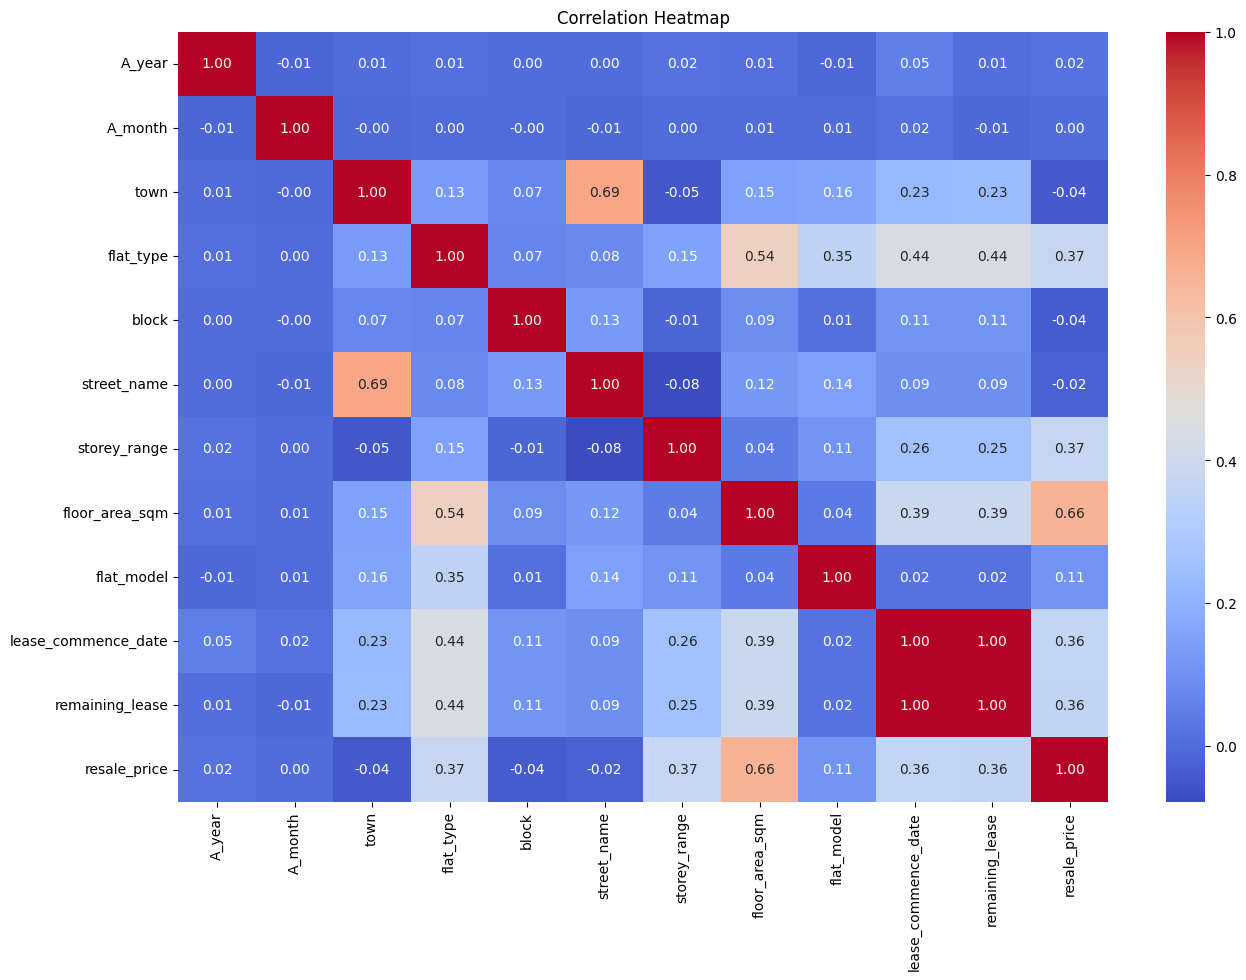

In [25]:
# Visualize the data as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_s.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [26]:
df_s = df_s.drop(columns=['A_month','block','street_name'])

In [28]:
# Prepare the features (X) and target variable (y)
X = df_s.drop(columns=['resale_price'])  # Drop the target column from features
y = df_s['resale_price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Initialize the model
model = LinearRegression()

In [31]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make predictions
y_pred = model.predict(X_test)

In [35]:
with open('model_test.pkl', 'wb') as file:
    pickle.dump(model, file)

In [36]:
# Make predictions
y_pred = model.predict(X_test)

In [37]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 7799691761.171126
R-squared: 0.5788685223268111
